In [63]:
import os
import random
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
classes = ["hI", "ka", "rI", "sa", "tI"]

def getCVData(folder):
	data = []

	for k in range(5):
		for i in os.listdir(f"./CV_Data/{classes[k]}/{folder}"):

			with open(f"./CV_Data/{classes[k]}/{folder}/{i}") as f:
				file = f.readlines()

				vec = []
				for line in file:
					vec.append([float(x) for x in line.rstrip().split()])

				label = [0, 0, 0, 0, 0]
				label[k] = 1

				vec = tf.constant(vec)
				# vec = tf.RaggedTensor.from_uniform_row_length(vec, uniform_row_length=39)

				letter = [label, vec]
				data.append(letter)
	
	random.shuffle(data)
	return data

In [36]:
train = getCVData("Train")
test = getCVData("Test")

In [41]:
def split(data):
	xdata = []
	ydata = []
	lens = []

	for i in range(len(data)):
		xdata.extend(data[i][1])
		lens.append(len(data[i][1]))
		ydata.append(data[i][0])

	xdata = tf.RaggedTensor.from_row_lengths(xdata, row_lengths=lens)
	ydata = tf.constant(ydata)
	return xdata, ydata

In [42]:
xtrain, ytrain = split(train)
xtest, ytest = split(test)

Epoch 1/1000
45/45 - 17s - loss: 1.0268 - accuracy: 0.5893 - 17s/epoch - 385ms/step
Epoch 2/1000
45/45 - 16s - loss: 0.5488 - accuracy: 0.8054 - 16s/epoch - 358ms/step
Epoch 3/1000
45/45 - 15s - loss: 0.3663 - accuracy: 0.8839 - 15s/epoch - 344ms/step
Epoch 4/1000
45/45 - 17s - loss: 0.2625 - accuracy: 0.9236 - 17s/epoch - 379ms/step
Epoch 5/1000
45/45 - 16s - loss: 0.1960 - accuracy: 0.9437 - 16s/epoch - 359ms/step
Epoch 6/1000
45/45 - 16s - loss: 0.1842 - accuracy: 0.9437 - 16s/epoch - 358ms/step
Epoch 7/1000
45/45 - 16s - loss: 0.1149 - accuracy: 0.9722 - 16s/epoch - 359ms/step
Epoch 8/1000
45/45 - 16s - loss: 0.0901 - accuracy: 0.9785 - 16s/epoch - 355ms/step
Epoch 9/1000
45/45 - 16s - loss: 0.0707 - accuracy: 0.9826 - 16s/epoch - 360ms/step
Epoch 10/1000
45/45 - 16s - loss: 0.0576 - accuracy: 0.9861 - 16s/epoch - 364ms/step
Epoch 11/1000
45/45 - 16s - loss: 0.0389 - accuracy: 0.9924 - 16s/epoch - 363ms/step
Epoch 12/1000
45/45 - 16s - loss: 0.0517 - accuracy: 0.9882 - 16s/epoch - 

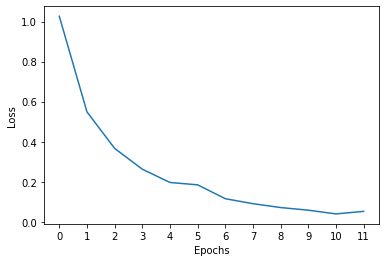

Train Accuracy: 0.990271021542738
Confusion Matrix
[[201   0   8   0   0]
 [  1 382   0   0   0]
 [  1   0 316   0   1]
 [  0   0   0 343   0]
 [  0   0   0   0 186]]

Test Accuracy: 0.8805555555555555
Confusion Matrix
[[42  1  4  0  5]
 [ 0 90  2  4  0]
 [ 5  1 69  0  5]
 [ 0  5  1 79  1]
 [ 3  1  4  1 37]]


In [64]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, return_sequences=True, batch_input_shape=(None, None, 39)))
model.add(keras.layers.LSTM(32, return_sequences=False))
model.add(keras.layers.Dense(5, activation='softmax', name="OutputLayer"))


es = keras.callbacks.EarlyStopping(monitor='loss', min_delta=1E-4, verbose=2, patience=2)
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, verbose=2, epochs=1000, callbacks=[es])


plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(1, len(history.history["loss"]) + 1))
plt.show()

trainpred = model.predict(xtrain)
trainpred = np.rint(trainpred)
print("Train Accuracy:", accuracy_score(ytrain, trainpred))
print("Confusion Matrix")
print(confusion_matrix(tf.argmax(ytrain, axis=1), tf.argmax(trainpred, axis=1)))

testpred = model.predict(xtest)
testpred = np.rint(testpred)
print("\nTest Accuracy:", accuracy_score(ytest, testpred))
print("Confusion Matrix")
print(confusion_matrix(tf.argmax(ytest, axis=1), tf.argmax(testpred, axis=1)))